# Fuel Economy Data
>This information is provided by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory. 

>For Data Description, click on this [link](https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf)

# Introduction

- In this project, I will be analyzing the data related to fuel economy of an automobile which is distance traveled by a vehicle and the amount of fuel consumed. I will analyze the 2008 and 2018 data simultaneously and look for the answers how fuel economy has changed in 10 year.  



- We will try to answer some questions like :

> Are more unique models using alternative sources of fuel? By how much?

> How much have vehicle classes improved in fuel economy?

> What are the characteristics of SmartWay vehicles? Have they changed over time?

> What features are associated with better fuel economy?

> For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()

'C:\\Users\\Shivam'

In [2]:
os.chdir("C:\\Users\\Shivam\Downloads")
os.getcwd()

'C:\\Users\\Shivam\\Downloads'

In [3]:
# load datasets
df_08 = pd.read_csv("all_alpha_08.csv")

df_18 = pd.read_csv("all_alpha_18.csv")

In [4]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [5]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


## Data Preparation

#### Drop Extraneous Columns
> First we will drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions

In [6]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [7]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],inplace=True,axis=1)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [8]:
# rename Sales Area to Cert Region
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [9]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ","_"),inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [10]:
df_08.rename(columns=lambda x: x.strip().lower().replace(" ","_"),inplace=True)
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [11]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

#### Filter by Certification Region

In [13]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [14]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [15]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [16]:
# drop certification region columns form both datasets
df_08.drop("cert_region",axis=1,inplace=True)
df_18.drop("cert_region",axis=1,inplace=True)

#### Drop Rows with Missing Values

In [17]:
# view missing value count for each feature in 2008
df_08.isna().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [18]:
# view missing value count for each feature in 2018
df_18.isna().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [19]:
# drop rows with any null values in both datasets
df_08.dropna(axis=0,inplace=True)
df_18.dropna(axis=0,inplace=True)

In [20]:
# checks if any of columns in 2008 have null values 
df_08.isnull().sum().any()

False

In [21]:
# checks if any of columns in 2018 have null values 
df_18.isnull().sum().any()

False

In [22]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
df_18.duplicated().sum()

23


3

In [23]:
# drop duplicates in both datasets
# print number of duplicates in 2008 and 2018 datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)
print(df_08.duplicated().sum())
df_18.duplicated().sum()

0


0

## Inspecting Data Types


In [24]:
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [25]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [26]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [27]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str[1:3].astype(int)

In [28]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [29]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int) 

### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

According to the error white converting string to float, the air pollution score value in one of the rows is "6/4" - let's check it out. "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
So all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [30]:
df_08[df_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [31]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [32]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [33]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [34]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [35]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [36]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [37]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [38]:
# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df_08.drop(hb_08.index, inplace=True)

# append new_rows to df_18
df_08 = df_08.append(new_rows)

##### Same process for the 2018 dataset

In [39]:
df1 = df_18[df_18.fuel.str.contains("/")]
df2 = df_18[df_18.fuel.str.contains("/")]

In [40]:
# list of columns to split
split_columns = ['fuel','city_mpg','hwy_mpg','cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

C:\Users\Shivam\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Shivam\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [41]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows)

In [42]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [43]:
# check that they're gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


### For `air_pollution_score`
- 2008: convert string to float
- 2018: convert int to float

In [44]:
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

### Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [45]:
# convert mpg columns to floats
mpg_columns = ["city_mpg","hwy_mpg","cmb_mpg"]
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

### Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [46]:
# convert from float to int
df_08['greenhouse_gas_score'] =  df_08.greenhouse_gas_score.astype(int)

In [47]:
df_08.dtypes == df_18.dtypes

model                    True
displ                    True
cyl                      True
trans                    True
drive                    True
fuel                     True
veh_class                True
air_pollution_score      True
city_mpg                 True
hwy_mpg                  True
cmb_mpg                  True
greenhouse_gas_score    False
smartway                 True
dtype: bool

In [48]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

## Exploring with Visuals

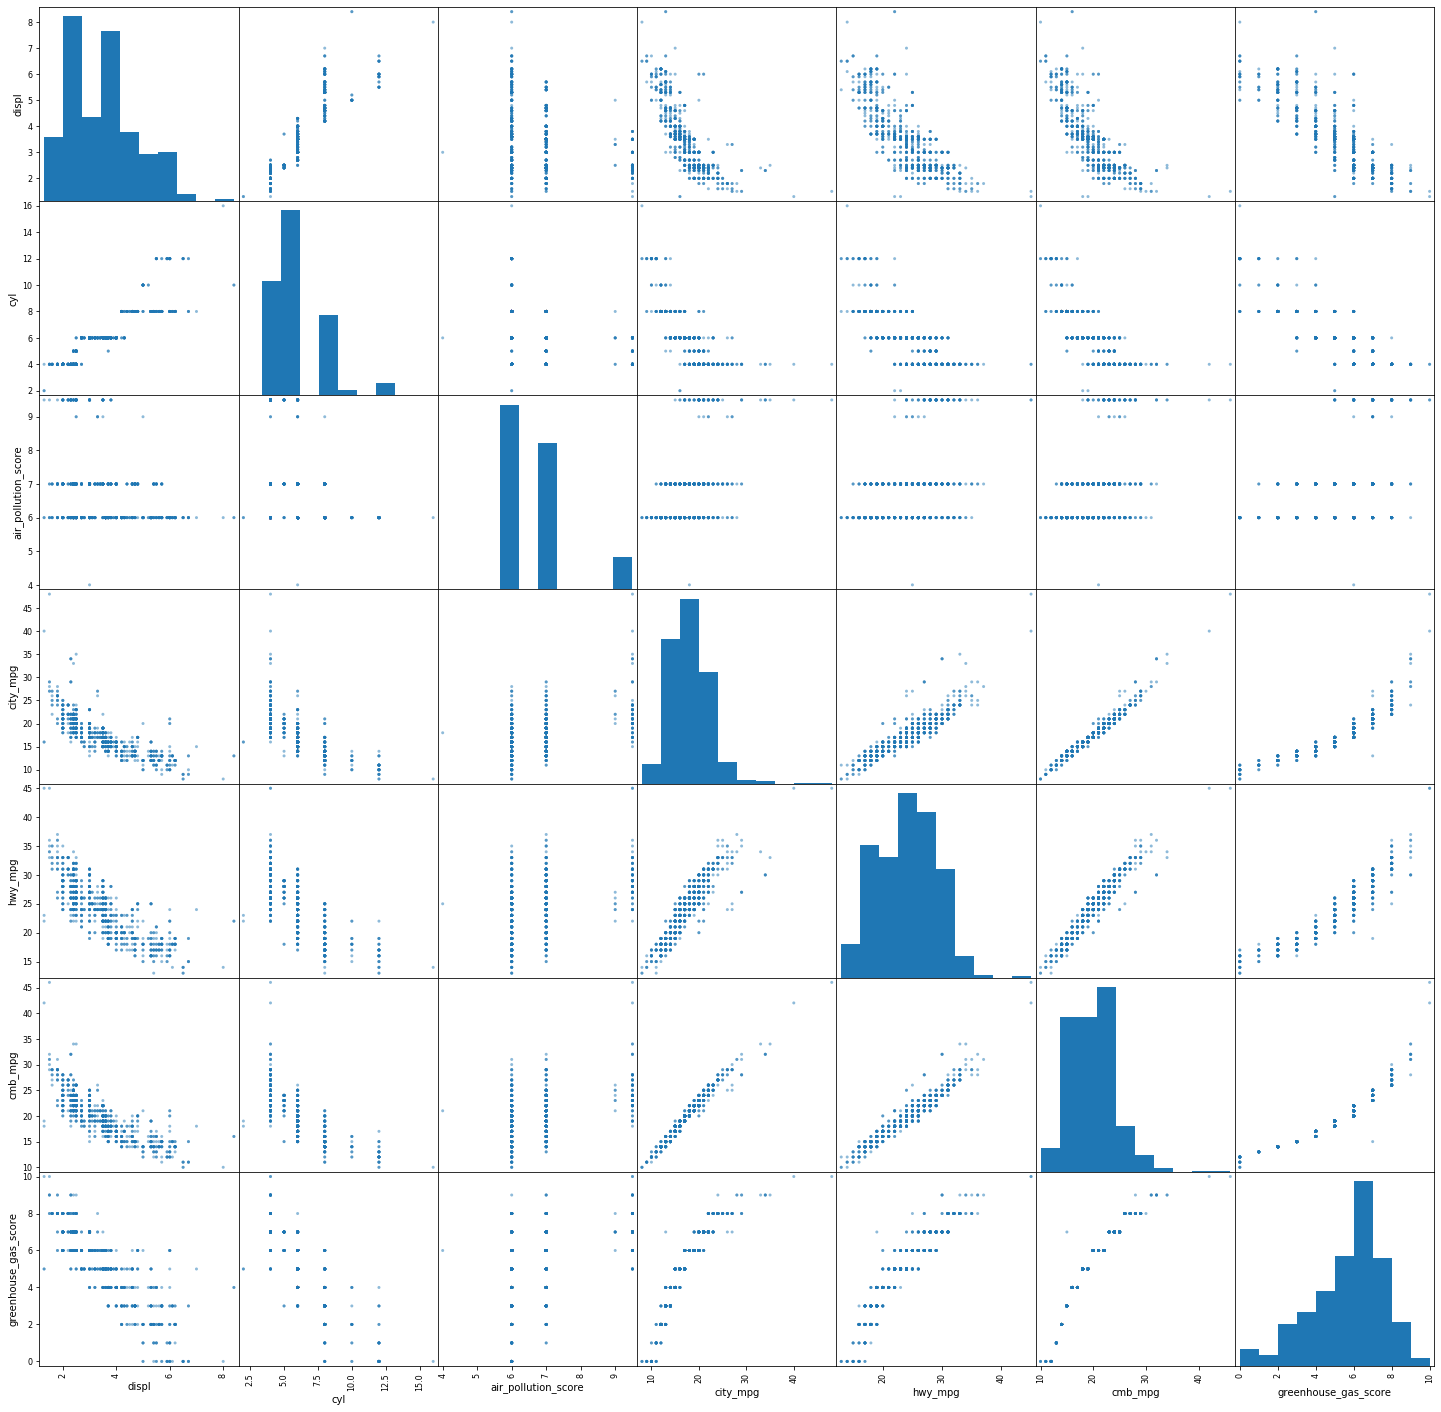

In [49]:
pd.plotting.scatter_matrix(df_08,figsize=(25,25));

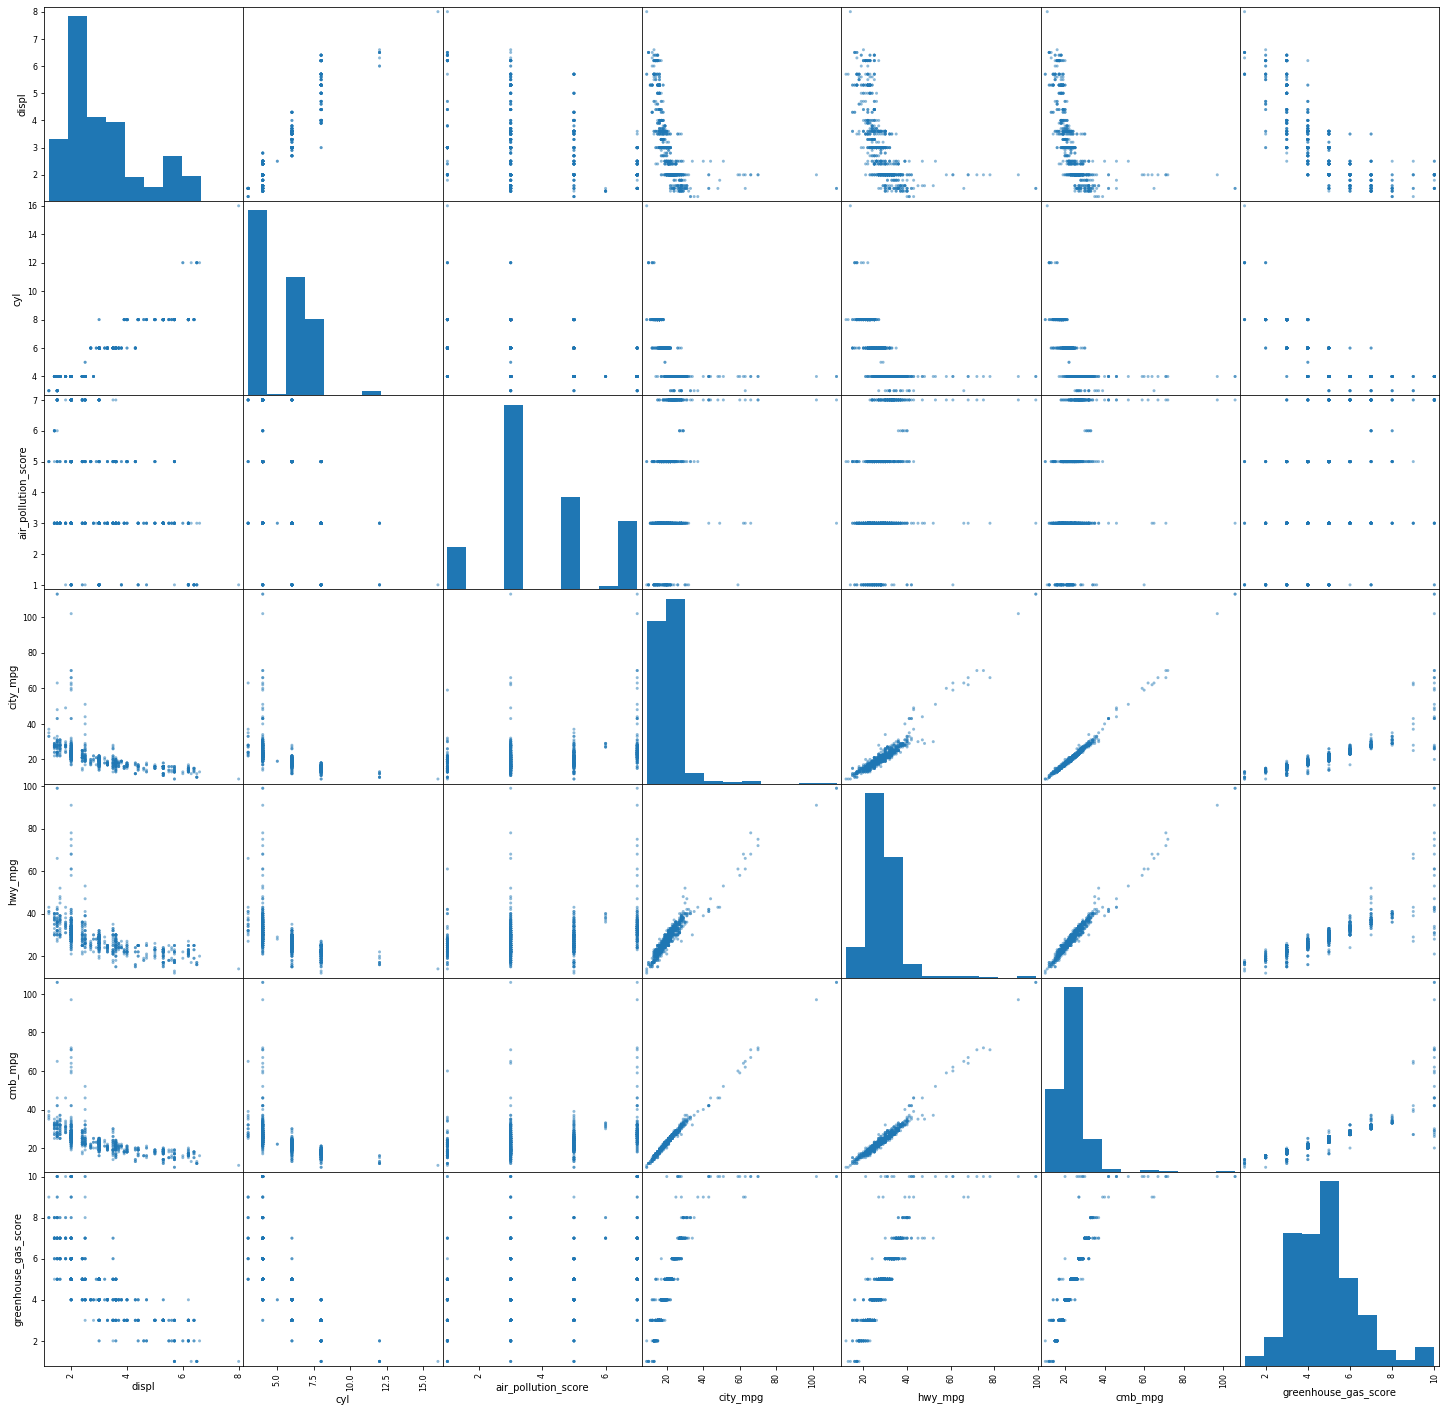

In [50]:
pd.plotting.scatter_matrix(df_18,figsize=(25,25));

### Insights from graphs

- Greenhouse house score in 2008 is more skewed to the left. And green house score of 2018 is skewed to right 

- The distribution of combined mpg became more skewed to right from 2008 to 2018

- We can onserve negative correlation between displacement score and combined mpg

- There is positive correlation between greenhouse gas score and combined mpg.

# Drawing Conclusions


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [51]:
df_08.fuel.value_counts()

Gasoline    984
gas           1
ethanol       1
CNG           1
Name: fuel, dtype: int64

In [52]:
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

As per [Google](www.google.com) the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. 

In [53]:
al_08 = df_08.query("fuel in ['CNG','ethanol']").model.nunique()
al_08

2

In [54]:
al_18 = df_18.query("fuel in ['Electricity','Ethanol']").model.nunique()
al_18

26

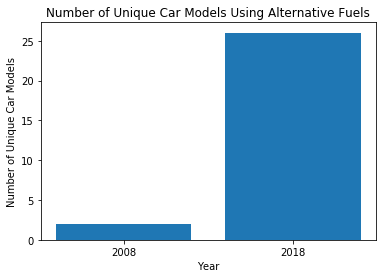

In [55]:
location = [0,1]
height = [al_08,al_18]
plt.bar(location,height,tick_label=[2008,2018])
plt.title("Number of Unique Car Models Using Alternative Fuels");
plt.xlabel("Year")
plt.ylabel("Number of Unique Car Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [56]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [57]:
prop_08 = al_08/total_08
prop_18 = al_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

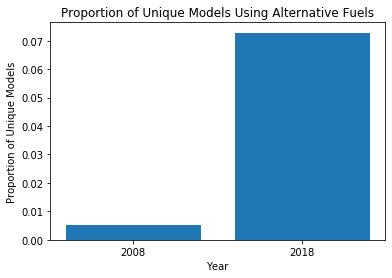

In [58]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

In [59]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [60]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [61]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

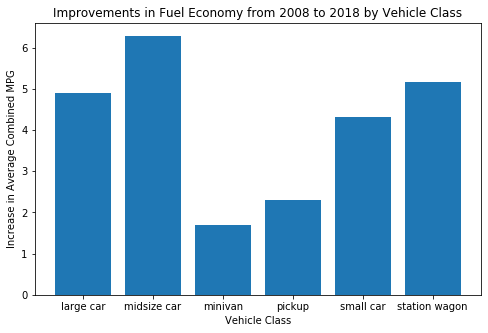

In [62]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [63]:
df_08.groupby(['smartway']).mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
no,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
yes,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421


In [64]:
df_18.groupby('smartway').mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
Elite,1.970588,4.000000,7.000000,53.235294,53.117647,53.000000,10.000000
No,3.270304,5.720994,3.798343,19.325967,26.708564,22.041436,4.276243
Yes,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462


### Q4: What features are associated with better fuel economy?

In [65]:
df_08.cmb_mpg.describe()

count    987.000000
mean      19.788247
std        4.251565
min       10.000000
25%       17.000000
50%       20.000000
75%       22.000000
max       46.000000
Name: cmb_mpg, dtype: float64

In [66]:
bet = df_08.query('cmb_mpg >= 20')
les = df_08.query('cmb_mpg < 20')

In [67]:
bet.mean()

displ                    2.667823
cyl                      4.890173
air_pollution_score      6.998073
city_mpg                20.317919
hwy_mpg                 27.603083
cmb_mpg                 22.992293
greenhouse_gas_score     6.639692
dtype: float64

In [68]:
les.mean()

displ                    4.416667
cyl                      7.277778
air_pollution_score      6.382479
city_mpg                14.134615
hwy_mpg                 20.085470
cmb_mpg                 16.235043
greenhouse_gas_score     3.596154
dtype: float64

In [69]:
df_18.cmb_mpg.describe()

count    832.000000
mean      24.030048
std        8.483171
min       10.000000
25%       19.000000
50%       23.000000
75%       27.000000
max      106.000000
Name: cmb_mpg, dtype: float64

In [70]:
bett = df_18.query('cmb_mpg >= 23')
less = df_18.query('cmb_mpg < 23')

In [71]:
bett.mean()

displ                    2.171397
cyl                      4.325942
air_pollution_score      4.554324
city_mpg                25.598670
hwy_mpg                 33.419069
cmb_mpg                 28.507761
greenhouse_gas_score     5.962306
dtype: float64

In [72]:
less.mean()

displ                    4.150919
cyl                      6.866142
air_pollution_score      3.304462
city_mpg                16.317585
hwy_mpg                 22.950131
cmb_mpg                 18.729659
greenhouse_gas_score     3.314961
dtype: float64

### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?


### Create combined dataset

In [73]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [74]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
6,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
7,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [75]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [76]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


##### A new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model



In [77]:
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [78]:
#  new column `mpg_change` is created with the change in mpg
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


#### The vehicle that improved the most


In [79]:
idx = model_mpg.mpg_change.idxmax()
idx

'VOLVO XC 90'

In [80]:
model_mpg.loc[idx]

cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64

# Reference:

- Data on Cars used for Testing Fuel Economy | US EPA. (2016). US EPA. Retrieved 7 May 2020, from https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy

- Fuel economy in automobiles. (2007). En.wikipedia.org. Retrieved 7 May 2020, from https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles

- Udacity. (2020). Classroom.udacity.com. Retrieved 7 May 2020, from https://classroom.udacity.com/nanodegrees/nd002/parts/6f1ba175-1429-48e9-ab26-44d08ab21e7e